In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from utils.utils import generate_synthetic_data, generate_final_features, split_dataset
import warnings 
warnings.filterwarnings("ignore")

In [104]:
#load model 
model = tf.keras.models.load_model('simulations/case1/case1_lstm_model.h5')

2023-05-31 20:42:23.308377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-31 20:42:23.310773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-31 20:42:23.312272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [105]:
total_regular_cycle_data = pd.read_csv('dataset/total_regular_cycle_data.csv')
features_total_regular_cycle_data, labels_total_regular_cycle_data = generate_final_features(total_regular_cycle_data)
input_train_total_regular_cycle, input_test_total_regular_cycle, output_train_total_regular_cycle, output_test_total_regular_cycle = split_dataset(features_total_regular_cycle_data, labels_total_regular_cycle_data, reshape=False)


In [106]:
# read history case 1
history = pd.read_csv('simulations/case1/case1_history_lstm.csv')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


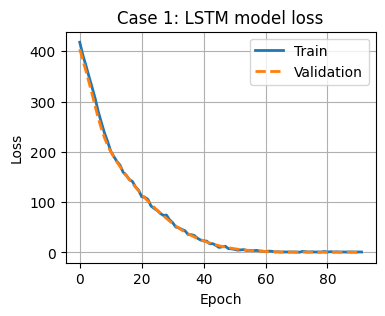

In [107]:
# plot the loss and val loss
plt.figure(figsize=(4, 3))
plt.plot(history['loss'], '-', linewidth=2)
plt.plot(history['val_loss'], '--', linewidth=2)
plt.grid(True)
plt.legend(['Train', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Case 1: LSTM model loss')
# log scale
#plt.yscale('log')




# save history
#history_df = pd.DataFrame(history.history)
#history_df.to_csv('case1_history_lstm.csv', index=False)

fig = plt.gcf()
fig.savefig('case1_loss_lstm.eps', dpi=300, bbox_inches='tight')


In [108]:
# make predictions
trainPredict = model.predict(input_train_total_regular_cycle)
testPredict = model.predict(input_test_total_regular_cycle)
testPredict = np.round(testPredict)

1/1 [==============================] - 0s 16ms/step


2023-05-31 20:42:25.454604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-31 20:42:25.457120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-31 20:42:25.459218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [109]:
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(output_test_total_regular_cycle, testPredict))
print('Test Score: %.4f MSE' % (testScore))

#RMSE 
print('Test Score: %.4f RMSE' % np.sqrt(testScore))

# calculate mean absolute error
testScore = mean_absolute_error(output_test_total_regular_cycle, testPredict)
print('Test Score: %.4f MAE' % (testScore))

# calculate r2 score
testScore = r2_score(output_test_total_regular_cycle, testPredict)
print('Test Score: %.4f R2' % (testScore))






Test Score: 0.5477 MSE
Test Score: 0.7401 RMSE
Test Score: 0.3000 MAE
Test Score: 0.4643 R2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


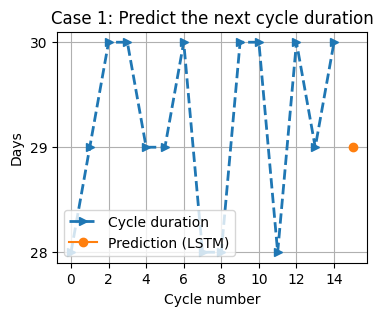

In [110]:
# plot baseline and predictions
plt.figure(figsize=(4, 3))
plt.plot(input_test_total_regular_cycle[:,:,0].reshape(-1,1), '-->', linewidth=2.0)
plt.plot(np.arange(15, 16),testPredict[0,0], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Cycle number')


plt.legend(['Cycle duration', 'Prediction (LSTM)'], loc='lower left')
plt.title('Case 1: Predict the next cycle duration')
plt.grid(True)

fig = plt.gcf()
fig.savefig('case1_prediction_lstm.eps', dpi=300, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


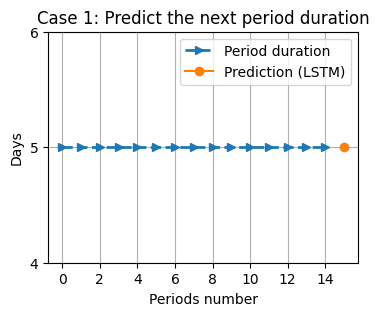

In [111]:
plt.figure(figsize=(4, 3))
plt.plot(input_test_total_regular_cycle[:,:,1].reshape(-1,1), '-->', linewidth=2.0)
plt.plot(np.arange(15, 16),testPredict[0,1], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
#set the y axis range
plt.ylim(4, 6)
plt.ylabel('Days')
plt.xlabel('Periods number')
plt.legend(['Period duration', 'Prediction (LSTM)'])
plt.title('Case 1: Predict the next period duration')
plt.grid(True)

fig = plt.gcf()
fig.savefig('case1_prediction_period_lstm.eps', dpi=300, bbox_inches='tight')

In [112]:
# model 2 
model = tf.keras.models.load_model('simulations/case2/case2_lstm_model.h5')

2023-05-31 20:42:29.659204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-31 20:42:29.661452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-31 20:42:29.663276: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [113]:
regular_cycle_data = pd.read_csv('dataset/regular_cycle_data.csv')
features_regular_cycle_data, labels_regular_cycle_data = generate_final_features(regular_cycle_data)
input_train_regular_cycle, input_test_regular_cycle, output_train_regular_cycle, output_test_regular_cycle = split_dataset(features_regular_cycle_data, labels_regular_cycle_data, reshape=False)

In [114]:

history = pd.read_csv('simulations/case2/case2_history_lstm.csv')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


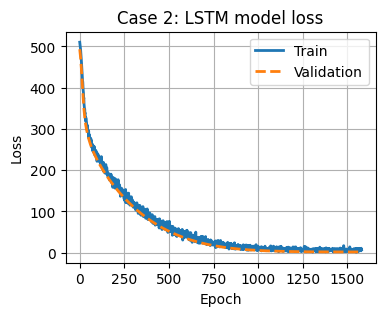

In [115]:
# plot the loss and val loss
plt.figure(figsize=(4, 3))
plt.plot(history['loss'], '-', linewidth=2)
plt.plot(history['val_loss'], '--', linewidth=2)
plt.grid(True)
plt.legend(['Train', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Case 2: LSTM model loss')
# log scale



# save figure
fig = plt.gcf()
fig.savefig('case2_loss_lstm.eps', dpi=300, bbox_inches='tight')


In [116]:
# make predictions
trainPredict = model.predict(input_train_regular_cycle)
testPredict = model.predict(input_test_regular_cycle)
testPredict = np.round(testPredict)

2023-05-31 20:42:32.504976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-31 20:42:32.507337: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-31 20:42:32.509070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 19ms/step


In [117]:
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(output_test_regular_cycle, testPredict))
print('Test Score: %.4f MSE' % (testScore))

#RMSE 
print('Test Score: %.4f RMSE' % np.sqrt(testScore))

# calculate mean absolute error
testScore = mean_absolute_error(output_test_regular_cycle, testPredict)
print('Test Score: %.4f MAE' % (testScore))

# calculate r2 score
testScore = r2_score(output_test_regular_cycle, testPredict)
print('Test Score: %.4f R2' % (testScore))






Test Score: 2.5495 MSE
Test Score: 1.5967 RMSE
Test Score: 2.1000 MAE
Test Score: -2.1808 R2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


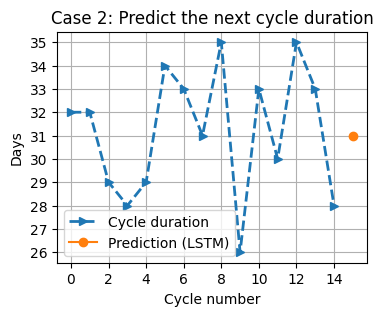

In [118]:
# plot baseline and predictions
plt.figure(figsize=(4, 3))
plt.plot(input_test_regular_cycle[:,:,0].reshape(-1,1), '-->', linewidth=2.0)
plt.plot(np.arange(15, 16),testPredict[0,0], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Cycle number')
plt.legend(['Cycle duration', 'Prediction (LSTM)'])
plt.title('Case 2: Predict the next cycle duration')
plt.grid(True)

# save figure
fig = plt.gcf()
fig.savefig('case2_prediction_lstm.eps', dpi=300, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


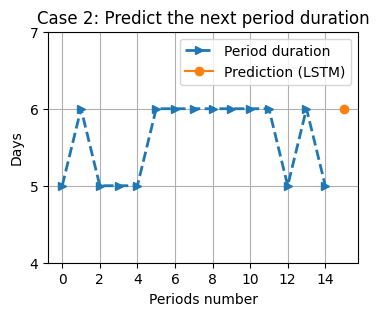

In [119]:
plt.figure(figsize=(4, 3))
plt.plot(input_test_regular_cycle[:,:,1].reshape(-1,1), '-->', linewidth=2.0)
plt.plot(np.arange(15, 16),testPredict[0,1], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
#set the y axis range
plt.ylim(4, 7)
plt.ylabel('Days')
plt.xlabel('Periods number')
plt.legend(['Period duration', 'Prediction (LSTM)'])
plt.title('Case 2: Predict the next period duration')
plt.grid(True)
# save figure

fig = plt.gcf()
fig.savefig('case2_prediction_period_lstm.eps', dpi=300, bbox_inches='tight')

In [120]:
# irregular data 
# model 3
model = tf.keras.models.load_model('simulations/case3/case3_lstm.h5')

# prediction 

irregular_cycle_data = pd.read_csv('dataset/irregular_cycle_data.csv')
features_irregular_cycle_data, labels_irregular_cycle_data = generate_final_features(irregular_cycle_data)
input_train_irregular_cycle, input_test_irregular_cycle, output_train_irregular_cycle, output_test_irregular_cycle = split_dataset(features_irregular_cycle_data, labels_irregular_cycle_data, reshape=False)


# make predictions
trainPredict = model.predict(input_train_irregular_cycle)
testPredict = model.predict(input_test_irregular_cycle)
testPredict = np.round(testPredict)




1/1 [==============================] - 0s 18ms/step


In [121]:
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(output_test_irregular_cycle, testPredict))
print('Test Score: %.4f MSE' % (testScore))

#RMSE 
print('Test Score: %.4f RMSE' % np.sqrt(testScore))

# calculate mean absolute error
testScore = mean_absolute_error(output_test_irregular_cycle, testPredict)
print('Test Score: %.4f MAE' % (testScore))

# calculate r2 score
testScore = r2_score(output_test_irregular_cycle, testPredict)
print('Test Score: %.4f R2' % (testScore))






Test Score: 4.2895 MSE
Test Score: 2.0711 RMSE
Test Score: 3.4000 MAE
Test Score: -0.9267 R2
